
# 머신러닝을 이용한 감성분석 

In [9]:
# 형태분석된 데이터 로딩
import pandas as pd

def write_data(data, filename, encoding='cp949'):        # 쓰기 함수
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = pd.read_csv('./origin/ratings_morphed.txt',sep ='\t', encoding='cp949')

print(len(data))
print(len(data.values[0])) 
print(data.values[0])

197514
3
[8132799
 '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사'
 1]


In [12]:
# 훈련 데이터와 테스트데이터 분리 (싸이킷런 모듈)
data_text = [line[1] for line in data.values]
data_senti = [line[2] for line in data.values]
from sklearn.model_selection import train_test_split
train_data_text , test_data_text, train_data_senti , test_data_senti = train_test_split(data_text , data_senti, stratify=data_senti)

# Counter 를 이용해 잘 분류되었는지 확인하기
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq :' , train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)

print('test_data_senti_freq : ' , test_data_senti_freq)

train_data_senti_freq : Counter({1: 74097, 0: 74038})
test_data_senti_freq :  Counter({1: 24699, 0: 24680})


In [45]:
# 훈련 데이터 테스트데이터 분리 (직접)
import random
random.shuffle(data.values)

data_70 = int(len(data) *0.7)
train_data = data[:data_70]
test_data = data[data_70:]

print('train data length : ', len(train_data))
print('test data length : ' , len(test_data))


# 학습데이터 요소 분리
train_data_text = [line[1] for line in train_data.values]      # 훈련데이터 본문
train_data_senti = [line[2] for line in train_data.values]     # 훈련데이터 긍부정 부분



# 테스트데이터 요소 분리
test_data_text = [line[1] for line in test_data.values]

test_data_senti = [line[2] for line in test_data.values]

train data length :  138259
test data length :  59255


In [46]:
# 행렬 형태로 변환
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5).fit(train_data_text)  # 문서 빈도 5이상의 단어만 대상
X_train = vect.transform(train_data_text)          # 행렬 생성
print("X_train:\n", repr(X_train))         #생성된 행렬 개요

X_train:
 <138259x11058 sparse matrix of type '<class 'numpy.int64'>'
	with 763966 stored elements in Compressed Sparse Row format>


In [47]:
#행렬 내용 관찰
feature_names = vect.get_feature_names()

print('특성 개수 : ' , len(feature_names))
print('처음 20개 특성 : \n', feature_names[:20])
print('3000~5000까지의 특성 : \n', feature_names[3000:5000])

특성 개수 :  11058
처음 20개 특성 : 
 ['10점', '1빠', 'cgv', 'ebs', 'jtbc', 'kbs', 'la', 'mb', 'mbc', 'naver', 'new', 'ok', 'sbs', 'sns', 'tv', 'ㄴㄴ', 'ㄷㄷ', 'ㅂㄷㅂㄷ', 'ㅂㅅ', 'ㅅㅂ']
3000~5000까지의 특성 : 
 ['만능', '만담', '만델라', '만두', '만들', '만들수', '만듦새', '만땅', '만만', '만만세', '만명', '만물', '만발', '만보', '만사', '만세', '만약', '만인', '만점', '만족', '만족감', '만지', '만찬', '만하', '만해', '만행', '만화', '만화가', '만화영화', '만화책', '만회', '많이', '말기', '말길', '말년', '말로', '말론', '말리', '말미', '말빨', '말살', '말세', '말씀', '말아먹', '말없이', '말입', '말자', '말장난', '말종', '말초신경', '말코비치', '말콤', '말투', '말하', '말하기', '말해', '맘껏', '맘대로', '맘마', '맘마미아', '맘속', '맙소사', '맛깔', '맛나', '맛보', '맛보기', '맛없', '맛있', '맛집', '망가', '망가지', '망각', '망상', '망설이', '망설임', '망신', '망인', '망쳐놓', '망치', '망하', '맞대', '맞먹', '맞물리', '맞서', '맞이', '맞추', '맞춤', '맡기', '매개체', '매국노', '매기', '매끄럽', '매너', '매년', '매니아', '매니저', '매달', '매달리', '매도', '매드', '매들린', '매듭', '매력', '매력적', '매료', '매미', '매번', '매수', '매염방', '매우', '매일', '매일매일', '매장', '매주', '매직', '매진', '매체', '매치', '매튜', '매트', '매트릭스', '매혹', '매혹적', '매회', '맥가이버', '맥과이어', '맥그리거', '맥라이언

In [48]:
# 머신러닝 알고리즘의 적용
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

y_train = pd.Series(train_data_senti)
print(len(y_train))
lr = LogisticRegression(solver="liblinear")

138259


In [49]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [50]:
# 테스트 데이터 입력

X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print('테스트 데이터 점수 :' , lr.score(X_test, y_test))

테스트 데이터 점수 : 0.6020926504092482


In [51]:
# 그리드 서치를 통한 최적 매개변수 찾기

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 3, 5]}          # 적절한 C 값의 범위를 설정한다. C는 규제 -> 과대적합,과소적합을 조정가능
grid = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5)
grid.fit(X_train, y_train)

print("최고 교차 검증 점수:", round(grid.best_score_, 3))
print("최적의 매개변수:", grid.best_params_)

X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)

print("테스트 데이터 점수:", grid.score(X_test, y_test))


최고 교차 검증 점수: 0.84
최적의 매개변수: {'C': 1}
테스트 데이터 점수: 0.6020926504092482


# 1개 데이터 예측 

In [52]:
import rhinoMorph as rM
rn = rM.startRhino()

# 형태소 분석
new_input = '오늘은 정말 재미있는 하루구나!'
inputdata = []
morphed_input = rhinoMorph.onlyMorph_list(rn, new_input , pos =['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morphed_input = ' '.join(morphed_input) 

inputdata.append(morphed_input)
print('input_data : ', inputdata)

filepath:  C:\Users\jye12\anaconda\lib\site-packages
classpath:  C:\Users\jye12\anaconda\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
input_data :  ['오늘 정말 재미있 하루']


In [53]:
X_input = vect.transform(inputdata)
result = lr.predict(X_input)

if result== '0':
    print('부정적인 글')
else:
    print('긍정적인 글')

긍정적인 글


C:\Users\jye12\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
vect.fit(data_text,data_senti)
X_train_2 = vect.transform(data_text)


In [56]:
import numpy as np
np.mean(cross_val_score(lr ,cv=10 , X=X_train_2, y=data_senti ))

0.8103374951007603

In [57]:
from tensorflow.keras.datasets import mnist
(train_images , train_labels ) ,( test_images , test_labels) = mnist.load_data()


print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [58]:
# 첫 번째 데이터를  본다
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [59]:
#출력 설정 
# 데이터의 타입을 확인한다
print(type(test_images))

# Numpy array 하나의 행을 한 줄에서 보도록 설정
# linewidth : 한줄에 출력할 문자의 최대수  np.inf 는 무한
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

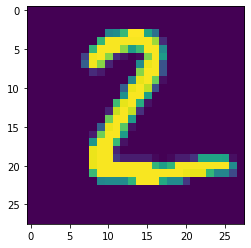

In [60]:
# 재출력
print(test_images[1])


# 각 셀의 숫자는 0~255의 색상값이다.
# 컬러로 출력을 해본다
import matplotlib.pyplot as plt
plt.imshow(test_images[1])